<h1>Степанов Вячеслав Анатольевич </h1>

<h3>БСВ23-01 </h3>

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def function_show(x, y, min_x, min_y, method_name):
    fig, ax = plt.subplots(figsize=(7, 5), dpi=150)
    ax.scatter(min_x, min_y, color="blue", marker='X', s=100, zorder=1, label="Корень")
    ax.plot(x, y, lw=2, color='red', zorder=0, label="Функция")
    
    # Линия y=0
    ax.axhline(0, color='green', lw=2, linestyle='--', zorder=0, label="y = 0")  
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    ax.set_title("Метод: " + method_name)
    ax.grid()
    ax.legend()
    ax.set_axisbelow(True)
    ax.annotate(f'({min_x:.3f}, {min_y:.3f})', xy=(min_x, min_y), xytext=(min_x, min_y + 0.1),
                textcoords='offset points', ha='center', color='blue', weight='bold')
    plt.show()

In [31]:
def plot_show(x, f_values, x_min, f_min,a0,b0, method_name):
    plt.plot(x, f_values, 'bo-', label='f(x)')
    plt.plot(x_min, f_min, 'ro', label='Минимум f(x)')
    plt.axvline(x=a0, color='g', linestyle='--', label='Границы интервала')
    plt.axvline(x=b0, color='g', linestyle='--')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Метод ' + method_name)
    plt.legend()
    plt.grid(True)
    plt.show()

# Методы минимизации 

## Метод равномерного поиска

In [32]:
# Метод Свенна для поиска начального интервала
"""def sven_method(x0, t, func):
    f0 = func(x0)
    f1 = func(x0 - t)
    f2 = func(x0 + t)
    
    if f1 >= f0 and f0 <= f2:
        return x0 - t, x0 + t
    else:
        raise ValueError("Не удалось найти начальный интервал неопределенности методом Свенна")
"""
# Алгоритм равномерного поиска
def uniform_search(a0,b0,func):
    epsilon = 0.01
    number_of_points = int(np.abs(a0 - b0)/epsilon) + 1
    x = np.linspace(a0, b0, number_of_points)
    f_values = func(x)
    
    k = np.argmin(f_values)
    x_min = x[k]
    f_min = f_values[k]
   
    interval = (x[k - 1], x[k + 1])

    # График
    plot_show(x, f_values, x_min, f_min,a0,b0, "равномерного поиска")
    
    # Вывод значений
    print("Метод равномерного поиска:")
    print(f"Точка минимума: x* ≈ {x_min}")
    print(f"Минимальное значение функции: f(x*) ≈ {f_min}")
    return 

## Метод деления интервала пополам

In [33]:
# Метод деления интервала пополам
def bisection_search(a0, b0, func):
    epsilon = 0.01
    a_k = a0
    b_k = b0
    k = 0
    
    while (b_k - a_k) > epsilon:
        xC_k = (a_k + b_k) / 2
        L_2k = b_k - a_k
        f_xC_k = func(xC_k)

        y_k = a_k + L_2k / 4
        z_k = b_k - L_2k / 4
        
        f_y_k = func(y_k)
        f_z_k = func(z_k)
        
        if f_y_k < f_xC_k:
            b_k = xC_k
            xC_k = y_k
        elif f_z_k < f_xC_k:
            a_k = xC_k
            xC_k = z_k
        else:
            a_k = y_k
            b_k = z_k
        
        k += 1
    
    x_min = (a_k + b_k) / 2
    f_min = func(x_min)
    
    # Визуализация
    x = np.linspace(a0, b0, 100)
    f_values = func(x)
    
    
# График
    plot_show(x, f_values, x_min, f_min,a0,b0, "деления интервала пополам")
    
    print("Метод деления интервала пополам")
    print(f"Точка минимума: x* ≈ {x_min}")
    print(f"Минимальное значение функции: f(x*) ≈ {f_min}")

    return 

## Метод дихотомии

In [34]:
# Метод дихотомии
def dichotomy_search(a0, b0, epsilon, l, func):
    a_k = a0
    b_k = b0
    k = 0
    
    while (b_k - a_k) > l:
        y_k = (a_k + b_k - epsilon) / 2
        z_k = (a_k + b_k + epsilon) / 2
        f_y_k = func(y_k)
        f_z_k = func(z_k)
        
        if f_y_k <= f_z_k:
            b_k = z_k
        else:
            a_k = y_k
        
        k += 1
       
    
    x_min = (a_k + b_k) / 2
    f_min = func(x_min)
    
    # Визуализация
    x = np.linspace(a0, b0, 100)
    f_values = func(x)
    
    plot_show(x, f_values,x_min,f_min,a0,b0,method_name="дихотомии")

    # Вывод значений
    print(f"Точка минимума: x* ≈ {x_min}")
    print(f"Минимальное значение функции: f(x*) ≈ {f_min}")

    return 


## Метод золотого сечения

In [35]:
def golden_section_search(a0, b0, func):
    
    # Константа для золотого сечения
    phi = (3 - np.sqrt(5)) / 2 
    
    # точность
    l = 0.01

    a_k = a0
    b_k = b0
    y_k = a_k + phi * (b_k - a_k)
    z_k = a_k + b_k - y_k
    f_y_k = func(y_k)
    f_z_k = func(z_k)
    
    while abs(b_k - a_k) > l:
        if f_y_k <= f_z_k:
            b_k = z_k
            z_k = y_k
            y_k = a_k + b_k - y_k
            f_z_k = f_y_k
            f_y_k = func(y_k)
        else:
            a_k = y_k
            y_k = z_k
            z_k = a_k + b_k - z_k
            f_y_k = f_z_k
            f_z_k = func(z_k)
    
    x_min = (a_k + b_k) / 2
    f_min = func(x_min)
    
    # Визуализация
    x = np.linspace(a0, b0, 100)
    f_values = func(x)
    
    plot_show(x, f_values,x_min,f_min,a0,b0,"золотого сечения")

    # Вывод значений
    print(f"Точка минимума: x* ≈ {x_min}")
    print(f"Минимальное значение функции: f(x*) ≈ {f_min}")

    return


## Метод фибоначчи

# Задачи минимизации

## $$ y = x^2 - 3x + \ln{x}, x \in [1, 2]$$

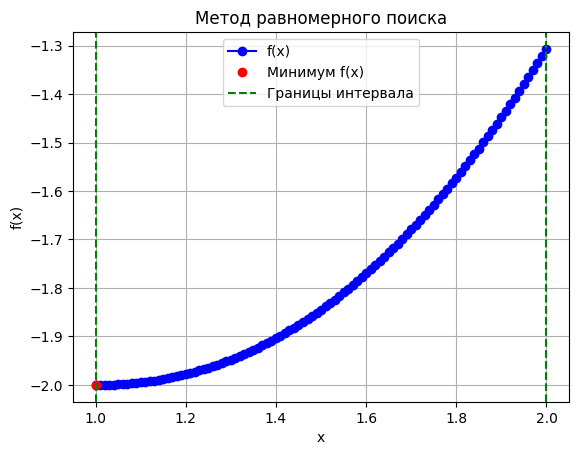

Метод равномерного поиска:
Точка минимума: x* ≈ 1.0
Минимальное значение функции: f(x*) ≈ -2.0


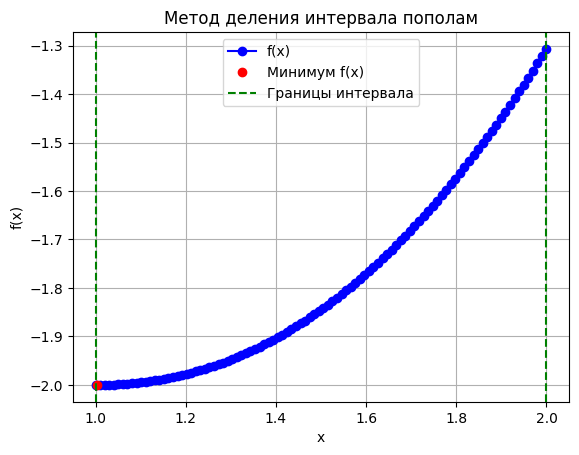

Метод деления интервала пополам
Точка минимума: x* ≈ 1.00390625
Минимальное значение функции: f(x*) ≈ -1.9999923507952801


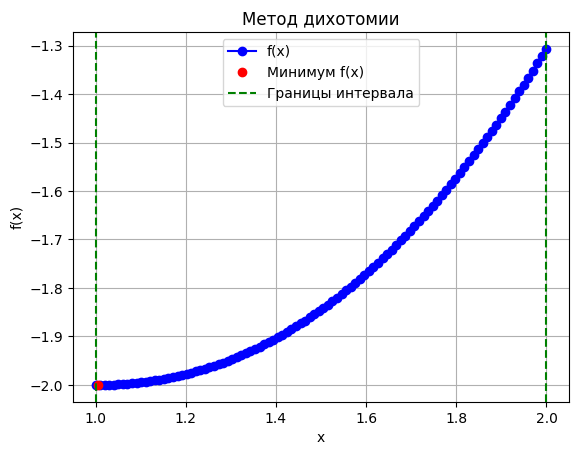

Точка минимума: x* ≈ 1.0044023437499998
Минимальное значение функции: f(x*) ≈ -1.9999902813382602


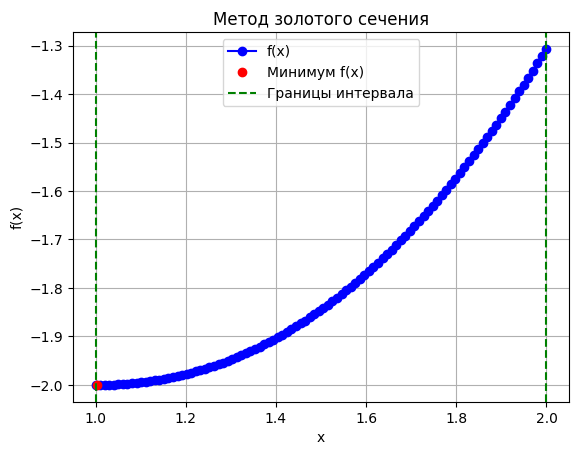

Точка минимума: x* ≈ 1.0040653093778902
Минимальное значение функции: f(x*) ≈ -1.9999917143024555


In [36]:
def f(x):
    return x**2 - 3 * x + np.log(x)
min_x = 1
max_x = 2
uniform_search(min_x, max_x,f)
bisection_search(min_x,max_x,f)
dichotomy_search(min_x,max_x,0.001, 0.01,f)
golden_section_search(min_x,max_x,f)

## $$ y = 0.25x^4 + x^2 -8x + 12, x \in [0, 2]$$

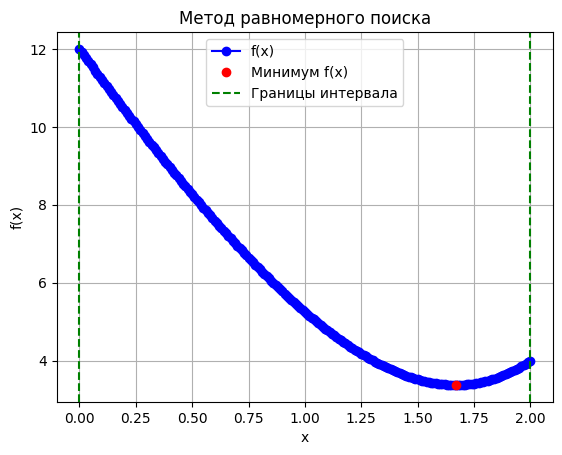

Метод равномерного поиска:
Точка минимума: x* ≈ 1.67
Минимальное значение функции: f(x*) ≈ 3.3733908025000012


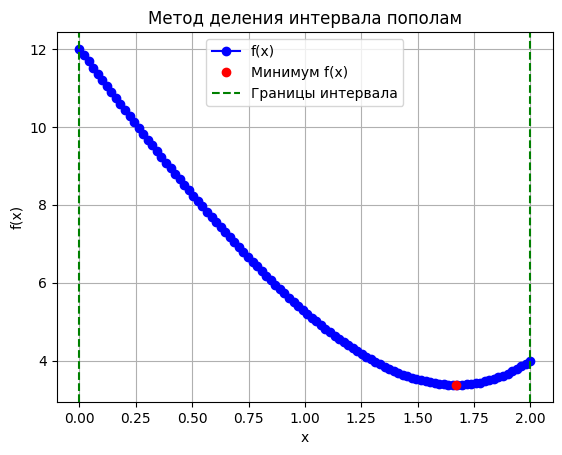

Метод деления интервала пополам
Точка минимума: x* ≈ 1.671875
Минимальное значение функции: f(x*) ≈ 3.3734042793512344


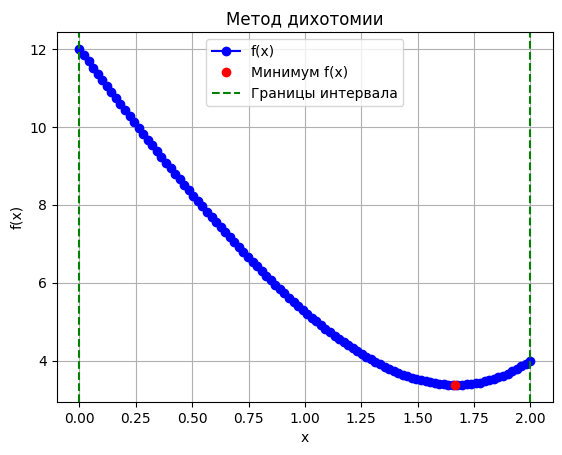

Точка минимума: x* ≈ 1.6676347656250003
Минимальное значение функции: f(x*) ≈ 3.3734257783994614


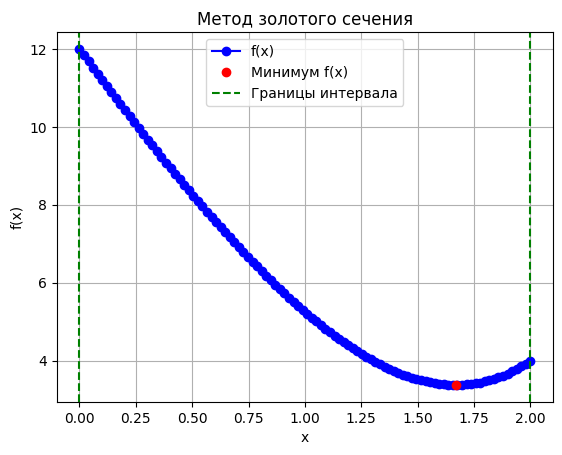

Точка минимума: x* ≈ 1.6687370800100894
Минимальное значение функции: f(x*) ≈ 3.3734022704364293


In [37]:
def f(x):
    return 0.25*x**4 + x**2 - 8*x + 12
min_x = 0
max_x = 2
# x0 = 1.5, N = 100, t = 0.5
uniform_search(min_x,max_x, f)
bisection_search(min_x,max_x,f)
dichotomy_search(min_x,max_x,0.001, 0.01,f)
golden_section_search(min_x,max_x,f)

## $$ y = x^6 - 2.08x^5 + 0.4875x^4 +7.1x^3 -3.95x^2 - x + 0.1, x \in [-2, 2]$$

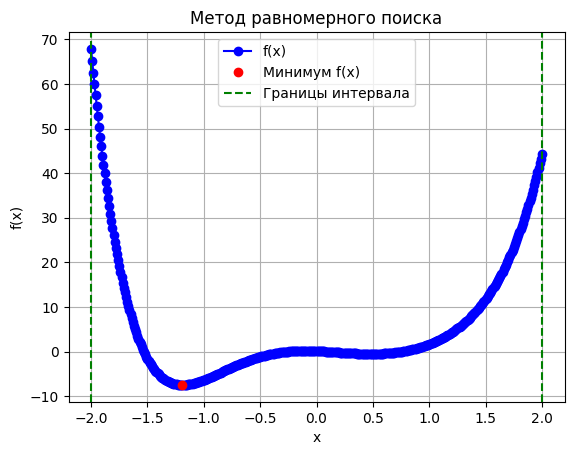

Метод равномерного поиска:
Точка минимума: x* ≈ -1.19
Минимальное значение функции: f(x*) ≈ -7.487244567252002


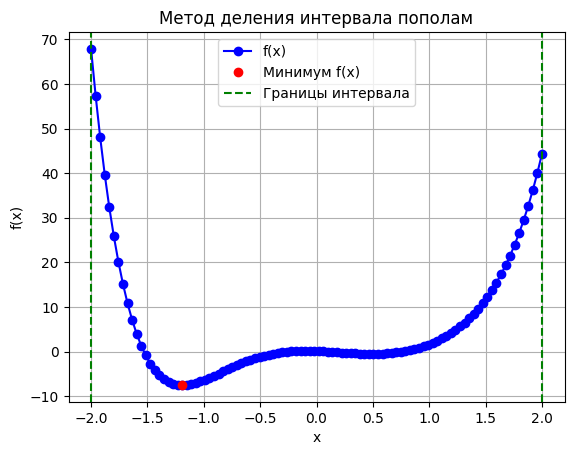

Метод деления интервала пополам
Точка минимума: x* ≈ -1.19140625
Минимальное значение функции: f(x*) ≈ -7.48731190937203


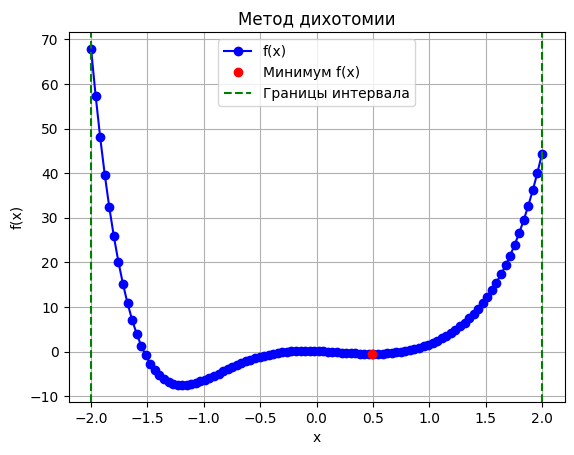

Точка минимума: x* ≈ 0.4881591796875
Минимальное значение функции: f(x*) ≈ -0.5199565128296789


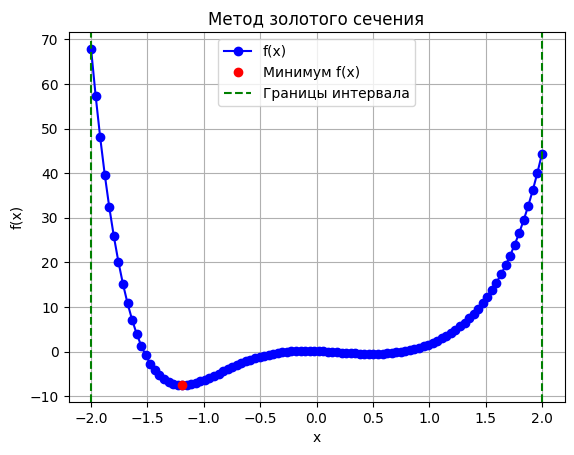

Точка минимума: x* ≈ -1.1896567475443511
Минимальное значение функции: f(x*) ≈ -7.487204085650996


In [38]:
def f(x):
    return x**6 - 2.08 * x**5 + 0.4875 * x**4 + 7.1 * x**3 - 3.95 * x**2 - x +0.1
min_x = -2
max_x = 2

uniform_search(min_x,max_x,f)
bisection_search(min_x,max_x,f)
dichotomy_search(min_x,max_x,0.001, 0.01,f)
golden_section_search(min_x,max_x,f)

## $$ y = 2 - \sin{6x} - \sin{4x}, x \in [0, 2.8]$$

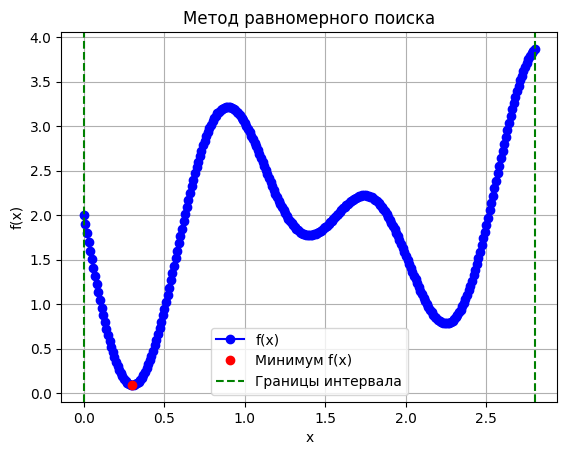

Метод равномерного поиска:
Точка минимума: x* ≈ 0.3
Минимальное значение функции: f(x*) ≈ 0.09411328315457856


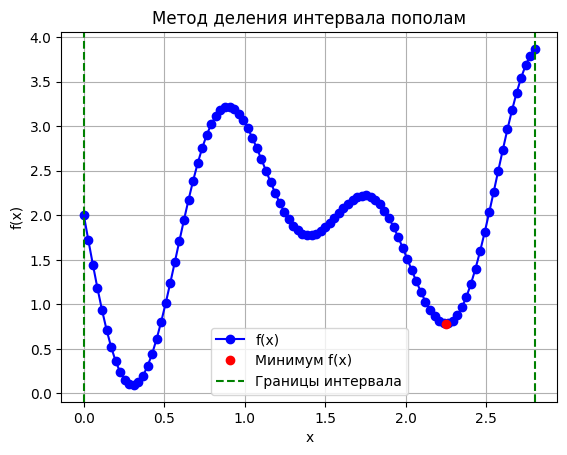

Метод деления интервала пополам
Точка минимума: x* ≈ 2.2476562499999995
Минимальное значение функции: f(x*) ≈ 0.7840187482072254


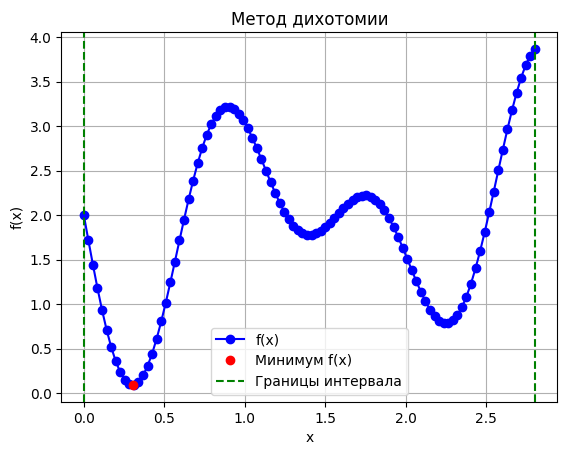

Точка минимума: x* ≈ 0.3039072265624999
Минимальное значение функции: f(x*) ≈ 0.09415757643167233


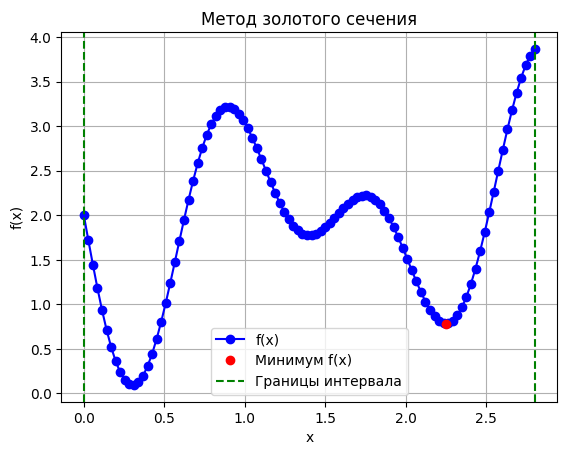

Точка минимума: x* ≈ 2.248490457560343
Минимальное значение функции: f(x*) ≈ 0.784024318047579


In [39]:
def f(x):
    return 2 - np.sin(6 * x) - np.sin(4 * x)
min_x = 0
max_x = 2.8

uniform_search(min_x,max_x,f)
bisection_search(min_x,max_x,f)
dichotomy_search(min_x,max_x,0.001, 0.01,f)
golden_section_search(min_x,max_x,f)